# TÉCNICAS DE APRENDIZAJE NO SUPERVISADO

Aunque en la actualidad la mayoría de las aplicaciones de Machine Learning están basadas en aprendizaje supervisado (y como resultado, es ahí donde van la mayoría de las inversiones), la gran mayoría de los datos disponibles en realidad no están etiquetados: tenemos características de entrada **X**, pero no tenemos etiquetas **y**. Yann LeCunn dijo que "si la inteligencia fuera un pastel, el aprendizaje no supervisado sería el pastel, el aprendizaje supervisado sería la guinda del pastel y el aprendizaje por refuerzo sería la cereza del pastel". En otras palabras, existe un enorme potencial en el aprendizaje no supervisado al que apenas hemos empezado a hincar el diente.

Por ejemplo, supongamos que queremos crear un sistema que tome algunas imágenes de cada artículo de una línea de producción y detecte cuáles son defectuosos. Podemos crear con bastante facilidad un sistema que tomara fotografías automáticamente, lo que nos proporcionaría miles de fotografías cada día. En solo unas pocas semanas dispondríamos de un enorme dataset. Pero espera, ¡no hay etiquetas! Si queremos entrenar un clasificador binario normal que prediga cuándo un artículo es defectuoso o no, necesitaremos etiquetar cada imagen individual como "defectuoso" o "normal". Esto normalmente requerirá que expertos humanos se sienten y revisen manualmente todas las imágenes. Esto es una tarea larga, costosa y tediosa, por lo que generalmente solo se realizará para un pequeño subconjunto de las imágenes disponibles. Como resultado, el dataset etiquetado será bastante pequeño y el rendimiento del clasificador será decepcionante. Además, cada vez que la compañía realice cambios en sus productos, será necesario reiniciar el proceso completo desde cero. ¿No sería genial si el algoritmo pudiera explotar los datos sin necesitad de que los humanos etiqueten cada imagen? Bienvenidos al aprendizaje no supervisado.

En el capítulo 8, vimos la tarea de aprendizaje no supervisado más común: la reducción dimensional. En este capítulo, veremos algunas tareas y algoritmos más de aprendizaje no supervisado:

+ *Clustering*: el objetivo es agrupar instancias similares juntas en un *cluster*. Esto es una gran herramienta para el análisis de datos, segmentación de clientes, sistemas de recomendación, motores de búsqueda, segmentación de imágenes, aprendizaje semi-supervisado, reducción dimensional y mas.

+ *Detección de anomalías*: el objetivo es aprender qué datos parecen "normales" y usar esto para detectar instancias anormales, como elementos defectuosos en una línea de producción o una nueva tendencia en series temporales.

+ *Estimación de densidad*: esta es la tarea de estimar la *función de densidad de la probabilidad* (PDF) del proceso aleatorio que generó el dataset. Se usa comunmente para la detección de anomalías: las instancias localizadas en regiones de muy baja densidad es probable que sean anomalías. También es útil para el análisis y visualización de datos.

¿Listo para un pastel? Empezaremos con el clustering, usando K-Means y DBSCAN, y después discutiremos los modelos de mezcla Gaussianos y veremos cómo pueden usarse para la estimación de densidad, clustering y detección de anomalías.

# Clustering

Mientras disfrutamos de una caminata por las montañas, nos topamos con una planta que nunca habíamos visto antes. Miramos a nuestro alrededor y nos damos cuenta de algunas más. No son exactamente idénticas, pero son lo suficientemente similares como para saber que probablemente pertenezcan a la misma especie (o al menos al mismo género). Es posible que necesitemos un botánico para que nos diga qué especie es, pero realmente no necesitamos un experto para identificar grupos de objetos que parecen similares. Esto se denomina *clustering*: es la tarea de identificar instancias similares y asignarlas a un *cluster*, es decir, grupos de instancias similares.

Como en la clasificación, cada instancia es asignada a un grupo. Sin embargo, esto es una tarea no supervisada. Consideremos la siguiente figura: a la izquierda está el dataset iris (que ya vimos en anteriores capítulos), donde cada especie de la instancia (es decir, su clase) está representada con un marcador diferente. Es un dataset etiquetado, para el cual los algoritmos de clasificación tales como el de Regresión Logística, SVM o Random Forest son muy adecuados. A la derecha está el mismo dataset, pero sin las etiquetas, por lo que ya no podemos usar un algoritmo de clasificación. Aquí es donde intervienen los algoritmos de clustering: la mayoría de ellos pueden detectar fácilmente el cluster situado más a la izquierda. También resulta fácil de ver con nuestros propios ojos, pero no es tan obvio que el cluster inferior derecho está compuesto realmente de dos sub-cluster distintos. Dicho esto, realmente el dataset tiene dos características adicionales (largo y ancho de sépalo), no representados aquí, y los algoritmos de clustering pueden hacer buen uso de todas las características, de hecho identifican bastante bien los tres clústeres (por ejemplo, usando un modelo de mezcla Gaussiana, solo 5 instancias de las 150 son asignadas a un cluster erróneo).

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

np.random.seed(42)

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

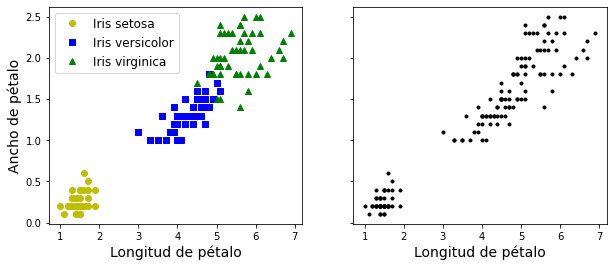

In [4]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Longitud de pétalo", fontsize=14)
plt.ylabel("Ancho de pétalo", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Longitud de pétalo", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

Un modelo de mezcla gaussiana (explicado a continuación) en realidad puede separar estos grupos bastante bien (usando las 4 características: longitud y ancho de pétalos y longitud y ancho de sépalos).

In [5]:
from sklearn.mixture import GaussianMixture

In [6]:
y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)
mapping = np.array([2, 0, 1])
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

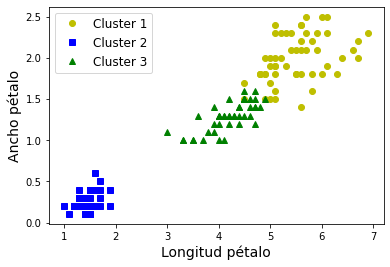

In [7]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Longitud pétalo", fontsize=14)
plt.ylabel("Ancho pétalo", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [8]:
np.sum(y_pred==y)

0

In [9]:
np.sum(y_pred==y) / len(y_pred)

0.0

El clustering se usa en una amplia variedad de aplicaciones, incluyendo:

+ Segmentación de clientes: podemos agrupar nuestros clientes basándonos en sus compras, su actividad en nuestro website, etc. Esto resulta muy útil para comprender quiénes son nuestros clientes y qué necesitan, así podemos adaptar nuestros productos y campañas de márketing a cada segmento. Por ejemplo, puede ser útil en *sistemas de recomendación* para sugerir contenido que les gustó a otros usuarios del mismo cluster.

+ Análisis de datos: cuando analizamos un nuevo dataset a menudo resulta útil en primer lugar descubrir grupos de instancias similares, ya que a menudo es más fácil analizar los clústeres por separado.

+ Como técnica de reducción dimensional: una vez que un dataset ha sido clusterizado, generalmente es posible medir la *afinidad* de cada instancia con cada cluster (afinidad es cualquier medida que nos diga cómo de bien una instancia encaja en un cluster). Cada vector **x** de características de cada instancia puede reemplazarse con el vector de sus clústeres afines. Si existen *k* clústeres, entonces este vector es *k* dimensional. Este es típicamente de mucha menor dimensión que el vector de características original, pero puede conservar suficiente información para su procesamiento posterior.

+ *Detección de anomalías* (también denominada *detección de atípicos*): cualquier instancia que tenga una baja afinidad con el resto de clústeres es probable que sea una anomalía. Por ejemplo, si hemos clusterizado los usuarios de nuestro website basándonos en su comportamiento, podemos detectar usuarios con un comportamiento inusual, tales como un número inusual de peticiones por segundo, etc. La detección de anomalías es particularmente útil en la detección de defectos de fabricación o en *detección de fraude*.

+ Aprendizaje semi-supervisado: si solo tenemos unas cuantas etiquetas, podemos ejecutar clustering y propagar las etiquetas a todas las instancias del mismo cluster. Esto puede aumentar drásticamente la cantidad de etiquetas disponibles para un subsiguiente algoritmo de aprendizaje supervisado y, por tanto, mejorar su rendimiento.

+ Para motores de búsqueda: por ejemplo, algunos motores de búsqueda nos dejan buscar por imágenes que son similares a una imagen de referencia. Para construir un sistema tal, primero deberíamos aplicar un algoritmo de clustering a todas las imágenes de nuestra base de datos: las imágenes similares terminarían en el mismo cluster. Entonces cuando un usuario proporcione una imagen de referencia, todo lo que necesitamos hacer es encontrar el cluster de la imagen usando un modelo entrenado en clustering y simplemente podemos devolver todas las imágenes pertenecientes a este cluster.

+ Segmentar una imagen: clusterizar píxeles de acuerdo a su color y después reemplazar cada color de pixel con el color medio de su cluster, nos permite reducir considerablemente el número de colores diferentes de la imagen. Esta técnica es usada en muchos sistemas de detección y seguimiento de objetos, ya que facilita la detección del contorno de cada objeto.

No existe una definición universal de qué es un cluster: depende realmente del contexto y algoritmos diferentes capturarán tipos diferentes de clústeres. Por ejemplo, algunos algoritmos buscan instancias centradas alrededor de un punto en particular, llamado *centroide*. Otros buscan regiones continuas de instancias densamente empaquetadas: estos grupos pueden tomar cualquier forma. Algunos algoritmos son jerárquicos, buscando clústeres de clústeres. Y la lista continúa.

En esta sección veremos dos populares algoritmos de clustering: K-Means y DBSCAN, y mostraremos algunas de sus aplicaciones, como la redución dimensional no lineal, el aprendizaje semi-supervisado y la detección de anomalías.

## K-Means

Consideremos el dataset no etiquetado representado en la siguiente figura: podemos ver claramente 5 manchas de instancias. El algoritmo K-Means es un sencillo algoritmo capaz de clusterizar este tipo de datasets muy rápida y eficientemente, a menudo en solo unas pocas iteraciones. Fue propuesto por Stuart Lloyd de los Laboratorios Bell en 1957 como una técnica para la modulación de códigos de pulsos, pero solo se publicó fuera de la compañía en 1982, en un artículo titulado ["Cuantización de mínimos cuadrados en PCM"](https://ieeexplore.ieee.org/abstract/document/1056489). Para entonces, en 1965, Edward W. Forgy había publicado virtualmente el mismo algoritmo, por lo que K-Means a veces se conoce como Lloyd-Forgy.

In [10]:
from sklearn.datasets import make_blobs

In [11]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [12]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

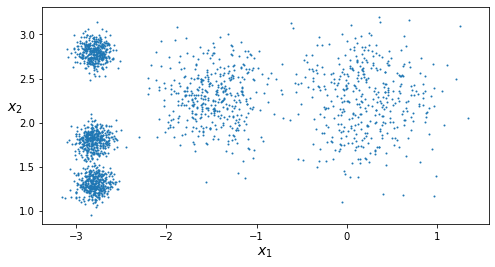

In [13]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

Vamos a entrenar un clusterizador K-Means en este dataset. Intentaremos encontrar el centro de cada mancha y asignar cada instancia a la mancha más cercana:

In [14]:
from sklearn.cluster import KMeans

In [15]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

Observemos que hemos especificado el número de clústeres *k* que el algoritmo debe buscar. En este ejemplo, es muy obvio echando un vistazo a los datos que *k* debe establecerse a 5, pero en general esto nos es tan fácil. Veremos esto en breve.

Cada instancia se asignó a uno de los 5 clústeres. En el contexto de clustering, una *etiqueta* de instancia es el índice del cluster al que el algoritmo asigna esta instancia, que no debe ser confundido con las etiquetas de clase en la clasificación (recordemos que clustering es una tarea de aprendizaje no supervisado). La instancia `KMeans` conserva una copia de las etiquetas de las instancias que entrena, disponibles a través de la variable de instancia `labels_`:

In [16]:
y_pred

array([4, 1, 0, ..., 3, 0, 1])

In [17]:
y_pred is kmeans.labels_

True

También podemos echar un vistazo a los 5 centroides que encontró el algoritmo:

In [18]:
kmeans.cluster_centers_

array([[ 0.20876306,  2.25551336],
       [-2.80389616,  1.80117999],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

Por supuesto, podemos asignar fácilmente nuevas instancias al cluster cuyo centroide está más cercano:

In [19]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 0, 3, 3])

Si dibujamos los límites de decisión de cada cluster, obtendríamos una teselación de Voronoi (véase la siguiente figura, donde cada centroide está representado por una X).

In [20]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

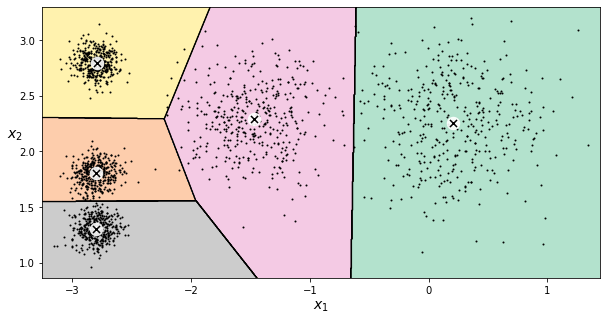

In [21]:
plt.figure(figsize=(10, 5))
plot_decision_boundaries(kmeans, X)
plt.show()

La gran mayoría de las instancias se asignaron claramente al cluster apropiado, pero algunas de ellas probablemente están mal etiquetadas (especialmente las cercanas al límite entre el cluster superior izquierdo y el cluster central). De hecho, el algoritmo K-Means no se comporta muy bien cuando los grupos tienen diámetros muy diferentes, dado que lo único que le importa al asignar una instancia a un cluster es la distancia al centroide.

En lugar de asignar cada instancia a un solo cluster, que se denomina *hard clustering*, puede ser útil dar a cada instancia una puntuación por cluster: esto se denomina *soft clustering*. Por ejemplo, la puntuación puede ser la distancia entre la instancia y el centroide o, por el contrario, puede ser una puntuación de similitud (o afinidad) tal como la Función Base Radial Gaussiana (vista en el capítulo 5). En la clase `Kmeans`, el método `transform()` mide la distancia de cada instancia a cada centroide:

In [22]:
kmeans.transform(X_new)

array([[0.32995317, 2.81093633, 1.49439034, 2.9042344 , 2.88633901],
       [2.80290755, 5.80730058, 4.4759332 , 5.84739223, 5.84236351],
       [3.29399768, 1.21475352, 1.69136631, 0.29040966, 1.71086031],
       [3.21806371, 0.72581411, 1.54808703, 0.36159148, 1.21567622]])

En este ejemplo, la primera instancia en `X_new` está localizada a una distancia de 0.32 del primer centroide, 2.81 del segundo centroide, 1.49 del tercer centroide, 2.90 del cuarto centroide y 2.88 del quinto centroide. Si tenemos un dataset de alta dimensión y lo transformamos de esta forma, terminaremos con un dataset de dimensión *k*: esta puede ser una técnica muy eficiente de reducción dimensional no lineal.

Podemos verificar que esta es realmente la distancia euclidiana entre cada instancia y cada centroide:

In [23]:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[0.32995317, 2.81093633, 1.49439034, 2.9042344 , 2.88633901],
       [2.80290755, 5.80730058, 4.4759332 , 5.84739223, 5.84236351],
       [3.29399768, 1.21475352, 1.69136631, 0.29040966, 1.71086031],
       [3.21806371, 0.72581411, 1.54808703, 0.36159148, 1.21567622]])

### El algoritmo K-Means

Entonces, ¿cómo funciona el algoritmo? Bueno, realmente es bastante simple. Supongamos que nos dieron los centroides: podríamos etiquetar fácilmente todas las instancias del dataset asignando cada una de ellas al cluster cuyo centroide esté más cercano. Por el contrario, si nos dan todas las etiquetas de instancias, podríamos localizar fácilmente todos los centroides calculando la media de las instancias de cada cluster. Pero si no nos dieran ni las etiquetas ni los centroides, ¿cómo podemos proceder? Bueno, simplemente comenzamos situando los centroides aleatoriamente (por ejemplo, eligiendo *k* instancias al azar y usando sus ubicaciones como centroides). Luego etiquetamos las instancias, actualizamos los centroides (para que sean la media de las instancias que se les asignan), etiquetamos las instancias, actualizamos los centroides y así sucesivamente hasta que los centroides dejen de moverse. El algoritmo garantiza converger en un número finito de pasos (normalmente bastante pequeño), y no oscilará para siempre (esto se puede demostrar señalando que la distancia cuadrática media entre las instancias y su centroide más cercano solo puede descender en cada paso).

Podemos ver el algoritmo en acción en la siguiente gráfica: los centroides se inicializan aleatoriamente (superior izquierda), luego las instancias son etiquetadas (superior derecha), luego los centroides son actualizados (central izquierda), se reetiquetan las instancias (central derecha) y así sucesivamente. Como se puede ver, en solo 3 iteraciones el algoritmo ha alcanzado un clustering que parece cercano al óptimo.

In [24]:
"""
La clase KMeans aplica un algoritmo optimizado por defecto. Para obtener el 
algoritmo K-Means original (solo con fines educativos), debemos establecer
init = "random", n_init = 1 y algorithm = "full".

Ejecutemos el algoritmo K-Means para 1, 2 y 3 iteraciones, para ver cómo se 
mueven los centroides:
"""

kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=3, n_clusters=5,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=1,
       tol=0.0001, verbose=0)

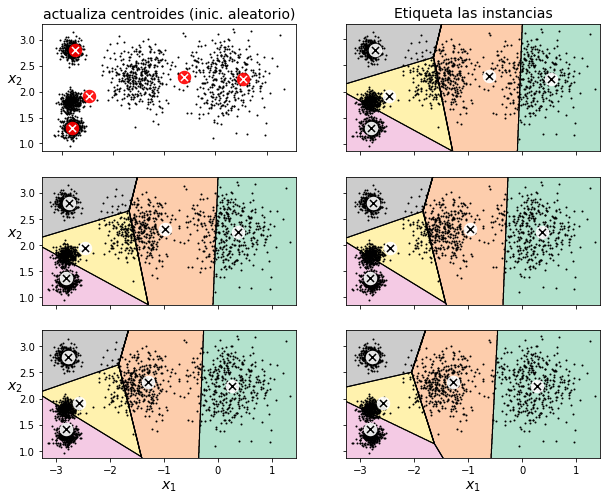

In [25]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("actualiza centroides (inic. aleatorio)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Etiqueta las instancias", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

---

La complejidad computacional del algoritmo es generalmente lineal con respecto al número de instancias *m*, el número de clústeres *k* y el número de dimensiones *n*. Sin embargo, esto solo es cierto cuando los datos tienen una estructura de clustering. Si no es así, entonces, en el peor de los casos, la complejidad puede aumentar exponencialmente con el número de instancias. En la práctica, sin embargo, esto rara vez ocurre, y K-Means es generalmente uno de los algoritmos de clustering más rápidos.

---

Desafortunadamente, aunque el algoritmo garantiza su convergencia, puede no converger a la solución correcta (es decir, puede converger a un óptimo local): depende de la inicialización del centroide. Por ejemplo, la siguiente figura muestra dos soluciones sub-óptimas a las que el algoritmo puede converger si no tenemos suerte con el paso de inicialización aleatoria:

In [26]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

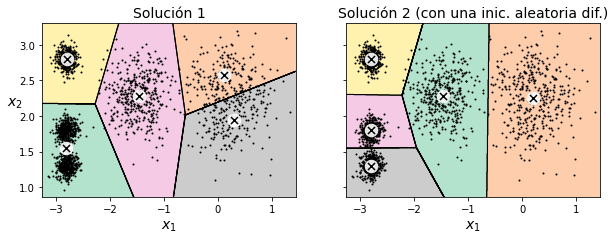

In [27]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full")
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full")

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solución 1", "Solución 2 (con una inic. aleatoria dif.)")

plt.show()

Veamos algunas formas de poder mitigar este riesgo mejorando la inicialización de los centroides.

### Métodos de inicialización de centroides

Si sabemos aproximadamente dónde deberían estar los centroides (por ejemplo, si anteriormente hemos ejecutado otro algoritmo de clustering), podemos establecer el hiperparámetro `init` con una matriz NumPy que contenga la lista de centroides y establecer `n_init`a `1`:

    good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
    kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

Otra solución es ejecutar el algoritmo múltiples veces con diferentes inicializaciones aleatorias y conservar la mejor solución. Esto se controla con el hiperparámetro `n_init`: por defecto, es igual a 10, lo que significa que todo el algoritmo descrito anteriormente en realidad se ejecuta 10 veces cuando llamamos a `fit()` y Scikit-Learn mantiene la mejor solución. ¿Pero cómo sabe exactamente cuál es la mejor solución? Bueno, por supuesto usa una métrica de rendimiento. Se denomina *inercia* del modelo: esta es la distancia cuadrática media entre cada instancia y su centroide más cercano. Es aproximadamente igual a 219,48 para el modelo de la izquierda de la figura anterior y 211,59 para el modelo de la derecha. La clase `KMeans` ejecuta el algoritmo `n_init` veces y conserva el modelo con la menor inercia.

Si somos curiosos, la inercia de un modelo es accesible a través de la variable de instancia `inertia_`:

In [28]:
kmeans_rnd_init1.inertia_, kmeans_rnd_init2.inertia_

(219.48142731436425, 211.59853725816822)

El método `score()` devuelve la inercia negativa. ¿Por qué negativa? Bueno, porque el método `score()` del predictor siempre debe respetar la regla "*grande es mejor*".

In [29]:
kmeans_rnd_init1.score(X), kmeans_rnd_init2.score(X)

(-219.4814273143641, -211.59853725816856)

In [30]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="full", random_state=11)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=300, n_clusters=5,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=11,
       tol=0.0001, verbose=0)

Como podemos ver, terminamos con el modelo inicial, que sin duda es la solución óptima de K-Means (al menos en términos de inercia, y suponiendo que $k=5$).

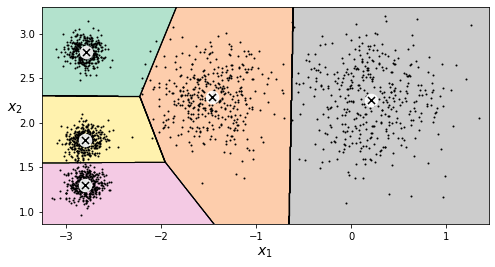

In [31]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

Una importante mejora al algoritmo K-Means, llamado *K-Means++*, se propuso en un [artículo de 2006](https://homl.info/37) por David Arthur y Sergei Vassilvitskii: introdujeron un paso de inicialización más inteligente que tendía a seleccionar centroides que están distantes el uno del otro, lo que hacía que el algoritmo K-Means sea mucho menos probable que converja a una solución subóptima. Mostraron que el cálculo adicional requerido para este paso de inicialización más inteligente vale la pena, dado que posibilita reducir drásticamente el número de veces que el algoritmo necesita ejecutarse para encontrar la solución óptima. Aquí está el algoritmo de inicialización K-Means++:

+ Toma un centroide **c**$_1$, elegido uniformemente al azar del dataset.

+ Toma un nuevo centroide **c**$_i$, eligiendo una instancia $\mathbf{x}_i$ con probabilidad: $D(\mathbf{x}_i)^2$ / $\sum\limits_{j=1}^{m}{D(\mathbf{x}_j)}^2$, donde $D(\mathbf{x}_i)$ es la distancia entre la instancia $\mathbf{x}_i$ y el centroide más cercanos que ya fue elegido. Esta distribución de probabilidad garantiza que las instancias que están más lejos de los centroides elegidos sean mucho más probables que sean elegidos como centroides.

+ Repite el paso anterior hasta que se hayan elegido todos los *k* centroides.

En realidad, la clase `KMeans` usa este método de inicialización por defecto. Si queremos forzar el uso del método original (es decir, elegir *k* instancias aleatoriamente para definir los centroides iniciales), entonces podemos establecer el hiperparámetro `init` a "`random`". Rara vez necesitaremos hacer esto.

Para establecer la inicialización en K-Means++, simplemente configuramos `init="k-means++"` (esto es realmente el valor predeterminado):

In [32]:
KMeans()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [33]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
kmeans.inertia_

211.5985372581684

### K-Means acelerados y K-Means de mini-lotes

Otra importante mejora al algoritmo K-Means se propuso en el [2003 en el artículo](https://homl.info/38) de Charles Elkan. Acelera considerablemente el algoritmo evitando muchos cálculos innecesarios de distancias: esto se consigue explotando la desigualdad triangular (es decir, la línea recta siempre es la más corta. La desigualdad triangular es AC $\leq$ AB + BC, donde A, B y C son tres puntos, y AB, AC y BC son las distancias entre esos puntos) y haciendo un seguimiento de los límites inferior y superior de las distancias entre las instancias y los centroides. Este es el algoritmo usado por defecto por la clase `KMeans` (pero podemos forzar el uso del algoritmo original estableciendo el hiperparámetro `algorithm` a `full`, aunque probablemente nunca necesitaremos hacerlo).

In [34]:
%timeit -n 50 KMeans(algorithm="elkan").fit(X)

70.1 ms ± 588 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [35]:
# Por defecto usa K-Means acelerado (Elkan)
%timeit -n 50 KMeans().fit(X)

71 ms ± 832 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [36]:
%timeit -n 50 KMeans(algorithm="full").fit(X)

94.2 ms ± 1.64 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


Otra importante variante de algoritmo K-Means fue propuesta en [2010 en el artículo](https://homl.info/39) de David Sculley. En lugar de usar el dataset completo en cada iteración, el algoritmo es capaz de usar mini-lotes, moviendo los centroides ligeramente en cada iteración. Esto normalmente acelera el algoritmo en una factor de 3 a 4 y hace posible clusterizar grandes datasets que no caben en memoria. Scikit-Learn implementa este algoritmo en laclase `MiniBatchKMeans`. Podemos usar esta clase como la clase `KMeans`:

In [37]:
from sklearn.cluster import MiniBatchKMeans

In [38]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [39]:
minibatch_kmeans.inertia_

211.93186531476775

Si el dataset no cabe en memoria, la opción más simple es usar la clase `memmap`, como hicimos para PCA incremental en el capítulo 8. Alternativamente, podemos pasar un mini-lote cada vez al método `partial_fit()`, pero esto requerirá mucho más trabajo, dado que necesitaremos ejecutar múltiples inicializaciones y seleccionar la mejor nosotros mismos. Veámoslo:

Primero vamos a cargar MNIST.

In [40]:
import urllib
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64)

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    mnist["data"], mnist["target"], random_state=42)

Ahora escribimos a un `memmap` :

In [42]:
filename = "my_mnist.data"
X_mm = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mm[:] = X_train

In [43]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
minibatch_kmeans.fit(X_mm)

MiniBatchKMeans(batch_size=10, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=10, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

Si nuestros datos son tan grandes que no podemos usar `memmap`, las cosas se vuelven más complicadas. Comencemos escribiendo una función para cargar el próximo lote (en la vida real, cargaríamos los datos del disco):

In [44]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

Ahora podemos entrenar el modelo alimentándolo con un lote a la vez. También necesitamos implementar múltiples inicializaciones y quedarnos con el modelo con la menor inercia:

In [45]:
np.random.seed(42)

In [46]:
k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500  # more data for K-Means++ initialization
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

In [47]:
best_kmeans.score(X)

-211.70999744411483

Aunque el algoritmo K-Means por mini-lotes es mucho más rápido que el algoritmo K-Means normal, su inercia es en general ligeramente peor, especialmente cuando aumenta el número de clústeres.

In [48]:
%timeit KMeans(n_clusters=5).fit(X)

39.2 ms ± 819 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [49]:
%timeit MiniBatchKMeans(n_clusters=5).fit(X)

23.2 ms ± 1.47 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Como podemos ver en la siguiente figura, la gráfica de la izquierda compara las inercias de los modelos K-Means por mini-lotes y K-Means entrenados en el anterior dataset usando varios números de clústeres *k*. La diferencia entre las dos curvas permanece ligeramente constante, pero esta diferencia se vuelve más y más significativa a medida que aumenta *k*, dado que la inercia se hace más y más pequeña. Sin embargo, en la gráfica de la derecha, podemos ver que K-Means por mini-lotes es mucho más rápido que K-Means normal y que esta diferencia aumenta con *k*.

In [50]:
from timeit import timeit

In [51]:
times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

100/100

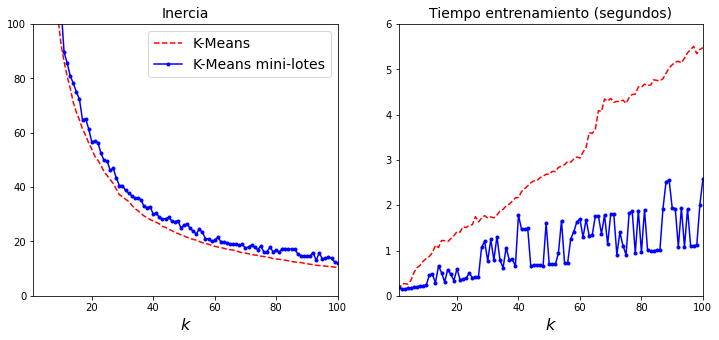

In [54]:
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="K-Means mini-lotes")
plt.xlabel("$k$", fontsize=16)
plt.title("Inercia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="K-Means mini-lotes")
plt.xlabel("$k$", fontsize=16)
plt.title("Tiempo entrenamiento (segundos)", fontsize=14)
plt.axis([1, 100, 0, 6])

plt.show()

### Buscando el número óptimo de clústeres

Hasta ahora, hemos establecido el número de clústeres *k* a 5 porque era obvio mirando los datos que éste era el número correcto de clústeres. Pero, en general, no será tan fácil de saber cómo establecer *k*, y el resultado puede ser bastante malo si establecemos el valor equivocado. Por ejemplo, como podemos ver en la siguiente figura, establecer *k* a 3 u 8 da como resultado modelos bastante malos:

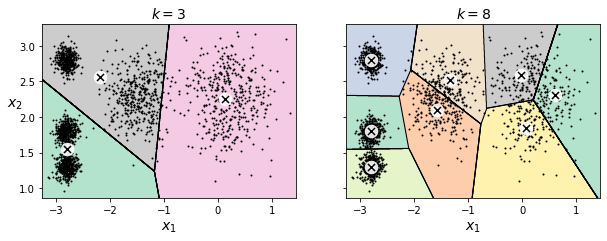

In [53]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

Quizás pensemos que podríamos elegir el modelo con la menor inercia ¿no?. Desafortunadamente no es tan simple. La inercia para *k*=3 es 653,2, que es mucho más alta que para *k*=5 (que es 211,6), pero con *k*=8 la inercia es solo 118,4.

In [56]:
kmeans_k3.inertia_, kmeans_k8.inertia_

(653.2167190021553, 118.41983763508077)

La inercia no es una buena métrica del rendimiento cuando intentamos elegir *k*, dado que sigue disminuyendo a medida que aumenta *k*. De hecho, cuantos más clústeres hay, más cerca estará cada instancia de su centroide más cercano y, por lo tanto, menor será la inercia. Dibujemos la inercia como una función de *k*:

In [57]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

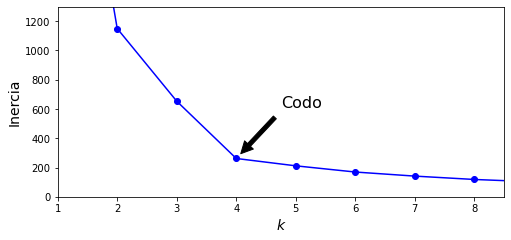

In [59]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inercia", fontsize=14)
plt.annotate('Codo',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

Como podemos ver, la inercia cae muy rápidamente a medida que crece *k* hasta 4, pero luego disminuye mucho más lentamente a medida que seguimos aumentando *k*. Esta curva tiene aproximadamente la forma de un brazo y hay un "codo" en *k*=4, por lo que si no lo supiéramos mejor, podría ser una buena opción: cualquier valor menor sería dramático, mientras que cualquier valor más alto no ayudaría demasiado y podríamos estar dividiendo clústeres perfectamente buenos por la mitad sin ninguna buena razón.

Esta técnica para elegir el mejor valor para el número de clústeres es bastante burda. Un enfoque más preciso (pero también computacionalmente más costoso) es usar la *puntuación de la silueta*, que es el *coeficiente de silueta* medio en todas las instancias. El coeficiente de silueta de una instancia es igual a *(b - a) / max(a, b)*, donde *a* e la distancia media a las otras instancias del mismo cluster (es la distancia media intra-cluster), y *b* es la distancia media al cluster más cercano, es decir, la distancia media a las instancias del siguiente cluster más cercano (definido como el que minimiza *b*, excluyendo el propio cluster de la instancia). El coeficiente de la silueta puede variar entre -1 y +1: un coeficiente cercano a +1 significa que la instancia está bien dentro de su propio cluster y lejos de otro clústeres, mientras que un coeficiente cercano a 0 significa que está cercano al límite del cluster y, por último, un coeficiente cercano a -1 significa que puede haber sido asignado al cluster erróneo. Para calcular la puntuación de la silueta, podemos usar la función `silhouette_Score()` de Scikit-Learn, dándole todas las instancias del dataset y las etiquetas a las que se les asignaron: